In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [133]:
# 读取CSV文件
df = pd.read_csv('axi.csv')


In [134]:
import pandas as pd
import re

# 假设 df 是你的数据框架，包含 'Duration' 列

# 使用正则表达式提取时间部分和秒数部分
pattern = r'(\d+:\d+:\d+)\.(\d+)'
matches = df['Duration'].str.extract(pattern)

# 将时间部分和秒数部分转换为 timedelta 和浮点数
time_part = pd.to_timedelta(matches[0])
seconds_part = matches[1].astype(float) / 10

# 将时间部分和秒数部分相加以获得总的持续时间
start_time = time_part.min()
df['Duration'] = pd.to_timedelta(seconds_part, unit='s') + (time_part - start_time)

# 打印处理后的数据
print(df['Duration'])


0     0 days 00:00:00
1     0 days 00:00:00
2     0 days 00:00:00
3     0 days 00:00:00
4     0 days 00:00:01
            ...      
636   0 days 00:01:16
637   0 days 00:01:16
638   0 days 00:01:17
639   0 days 00:01:17
640   0 days 00:01:17
Name: Duration, Length: 641, dtype: timedelta64[ns]


In [135]:
# 将时间部分和秒数部分相加以获得总的持续时间
start_time = time_part.min()
df['Duration'] = pd.to_timedelta(seconds_part, unit='s') + time_part - start_time

# 计算每秒钟的数据数量并存储在字典中
count_per_second = {}
for time in df['Duration']:
    if time not in count_per_second:
        count_per_second[time] = 1
    else:
        count_per_second[time] += 1

# 添加0.1秒以确保时间戳唯一，并重新构建 DataFrame
new_rows = []
for index, row in df.iterrows():
    time = row['Duration']
    count = count_per_second[time]
    tenth_second = index % count  # 计算0.1秒
    new_time = time + timedelta(milliseconds=tenth_second * 100)
    new_rows.append({'Time': new_time, 'Duration': row['Duration'],
                     'IMU1 AccX': row['IMU1 AccX'], 'IMU1 AccY': row['IMU1 AccY'], 'IMU1 AccZ': row['IMU1 AccZ'],
                     'IMU1 GyroX': row['IMU1 GyroX'], 'IMU1 GyroY' : row['IMU1 GyroY'], 'IMU1 GyroZ': row['IMU1 GyroZ'],
                     'IMU2 AccX': row['IMU2 AccX'], 'IMU2 AccY': row['IMU2 AccY'], 'IMU2 AccZ': row['IMU2 AccZ'],
                     'IMU2 GyroX': row['IMU2 GyroX'], 'IMU2 GyroY' : row['IMU2 GyroY'], 'IMU2 GyroZ': row['IMU2 GyroZ'],
                     'IMU3 AccX': row['IMU3 AccX'], 'IMU3 AccY': row['IMU3 AccY'], 'IMU3 AccZ': row['IMU3 AccZ'],
                     'IMU3 GyroX': row['IMU3 GyroX'], 'IMU3 GyroY' : row['IMU3 GyroY'], 'IMU3 GyroZ': row['IMU3 GyroZ']})

df2 = pd.DataFrame(new_rows)

# 根据时间戳重新排列数据
df2 = df2.sort_values(by='Time')

print(df2)




                      Time        Duration  IMU1 AccX  IMU1 AccY  IMU1 AccZ  \
0          0 days 00:00:00 0 days 00:00:00       0.05      -0.60      -0.77   
1   0 days 00:00:00.100000 0 days 00:00:00       0.05      -0.59      -0.77   
2   0 days 00:00:00.200000 0 days 00:00:00       0.05      -0.59      -0.77   
3   0 days 00:00:00.300000 0 days 00:00:00       0.05      -0.59      -0.77   
8          0 days 00:00:01 0 days 00:00:01       0.04      -0.61      -0.77   
..                     ...             ...        ...        ...        ...   
630 0 days 00:01:16.600000 0 days 00:01:16       0.34      -1.27      -1.10   
631 0 days 00:01:16.700000 0 days 00:01:16       0.23      -0.73      -0.82   
639        0 days 00:01:17 0 days 00:01:17      -1.01       0.21       0.44   
640 0 days 00:01:17.100000 0 days 00:01:17      -0.85       0.03       0.22   
638 0 days 00:01:17.200000 0 days 00:01:17      -0.91       0.28       0.41   

     IMU1 GyroX  IMU1 GyroY  IMU1 GyroZ  IMU2 AccX 

                      Time        Duration  IMU1 AccX  IMU1 AccY  IMU1 AccZ  \
264        0 days 00:00:32 0 days 00:00:32       0.00      -0.79      -0.60   
265 0 days 00:00:32.100000 0 days 00:00:32       0.04      -0.78      -0.65   
266 0 days 00:00:32.200000 0 days 00:00:32       0.02      -0.72      -0.68   
267 0 days 00:00:32.300000 0 days 00:00:32       0.01      -0.70      -0.69   
268 0 days 00:00:32.400000 0 days 00:00:32       0.03      -0.72      -0.65   
..                     ...             ...        ...        ...        ...   
428 0 days 00:00:51.400000 0 days 00:00:51      -0.02      -0.91      -0.70   
421 0 days 00:00:51.500000 0 days 00:00:51       0.03      -0.70      -0.68   
422 0 days 00:00:51.600000 0 days 00:00:51       0.01      -0.65      -0.70   
423 0 days 00:00:51.700000 0 days 00:00:51       0.02      -0.66      -0.72   
432        0 days 00:00:52 0 days 00:00:52       0.03      -0.71      -0.67   

     IMU1 GyroX  IMU1 GyroY  IMU1 GyroZ  IMU2 AccX 

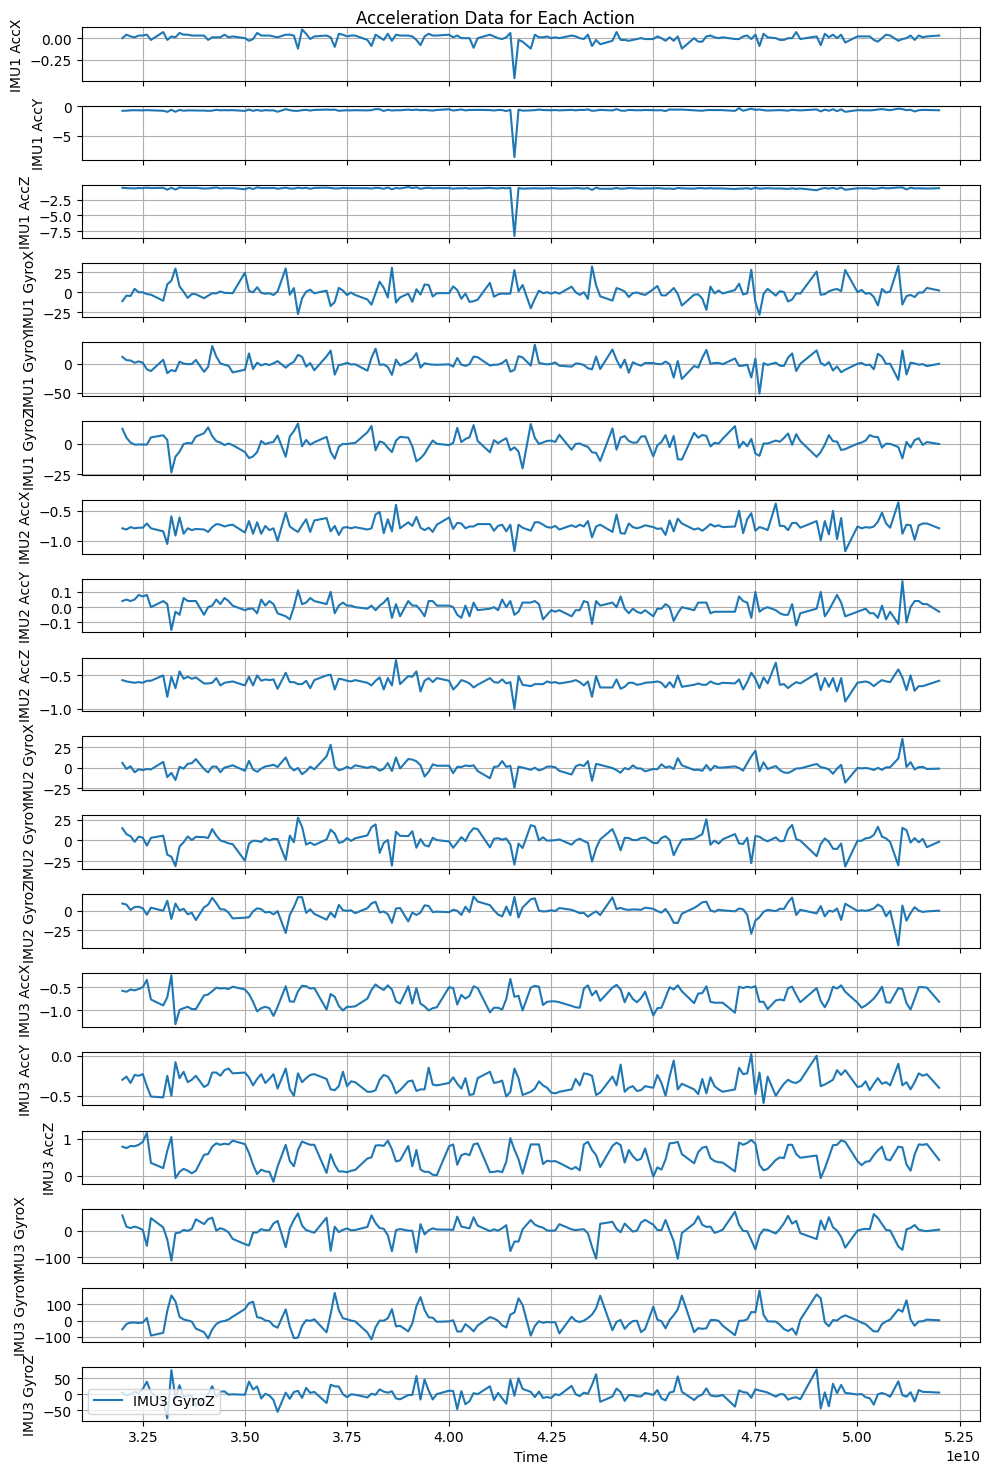

In [136]:
import matplotlib.pyplot as plt

# 定义32秒和54秒的时间增量
start_time = pd.Timedelta(seconds=32)
end_time = pd.Timedelta(seconds=52)

# 选择持续时间在32秒到54秒之间的数据
desired_data = df2[(df2['Time'] >= start_time) & (df2['Time'] <= end_time)]

print(desired_data)

# 提取每个动作的数据列
# 提取每个动作的数据列
actions_acc = [desired_data['IMU1 AccX'], desired_data['IMU1 AccY'], desired_data['IMU1 AccZ'], desired_data['IMU1 GyroX'], desired_data['IMU1 GyroY'], desired_data['IMU1 GyroZ'],
               desired_data['IMU2 AccX'], desired_data['IMU2 AccY'], desired_data['IMU2 AccZ'], desired_data['IMU2 GyroX'], desired_data['IMU2 GyroY'], desired_data['IMU2 GyroZ'],
               desired_data['IMU3 AccX'], desired_data['IMU3 AccY'], desired_data['IMU3 AccZ'], desired_data['IMU3 GyroX'], desired_data['IMU3 GyroY'], desired_data['IMU3 GyroZ']]


# 创建一个新的图形，并设置子图布局
fig, axs_acc = plt.subplots(len(actions_acc), 1, figsize=(10, 15), sharex=True)

# 调整子图布局
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.3)

# 绘制每个动作的数据列（加速度）在特定时间范围内
for i, action_data_acc in enumerate(actions_acc):
    axs_acc[i].plot(desired_data['Time'], action_data_acc, label=action_data_acc.name)
    axs_acc[i].set_ylabel(action_data_acc.name)
    axs_acc[i].grid(True)

# 添加图例和标题（加速度图）
plt.legend()
plt.xlabel('Time')
plt.suptitle('Acceleration Data for Each Action')

# 显示加速度图
plt.tight_layout()
plt.show()


<ipython-input-137-63fcd8d7fff1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desired_data[column.name] = smoothed_actions_acc[i]


                      Time        Duration  IMU1 AccX  IMU1 AccY  IMU1 AccZ  \
264        0 days 00:00:32 0 days 00:00:32      0.000     -0.395     -0.300   
265 0 days 00:00:32.100000 0 days 00:00:32      0.020     -0.785     -0.625   
266 0 days 00:00:32.200000 0 days 00:00:32      0.030     -0.750     -0.665   
267 0 days 00:00:32.300000 0 days 00:00:32      0.015     -0.710     -0.685   
268 0 days 00:00:32.400000 0 days 00:00:32      0.020     -0.710     -0.670   
..                     ...             ...        ...        ...        ...   
428 0 days 00:00:51.400000 0 days 00:00:51      0.005     -0.770     -0.645   
421 0 days 00:00:51.500000 0 days 00:00:51      0.005     -0.805     -0.690   
422 0 days 00:00:51.600000 0 days 00:00:51      0.020     -0.675     -0.690   
423 0 days 00:00:51.700000 0 days 00:00:51      0.015     -0.655     -0.710   
432        0 days 00:00:52 0 days 00:00:52      0.025     -0.685     -0.695   

     IMU1 GyroX  IMU1 GyroY  IMU1 GyroZ  IMU2 AccX 

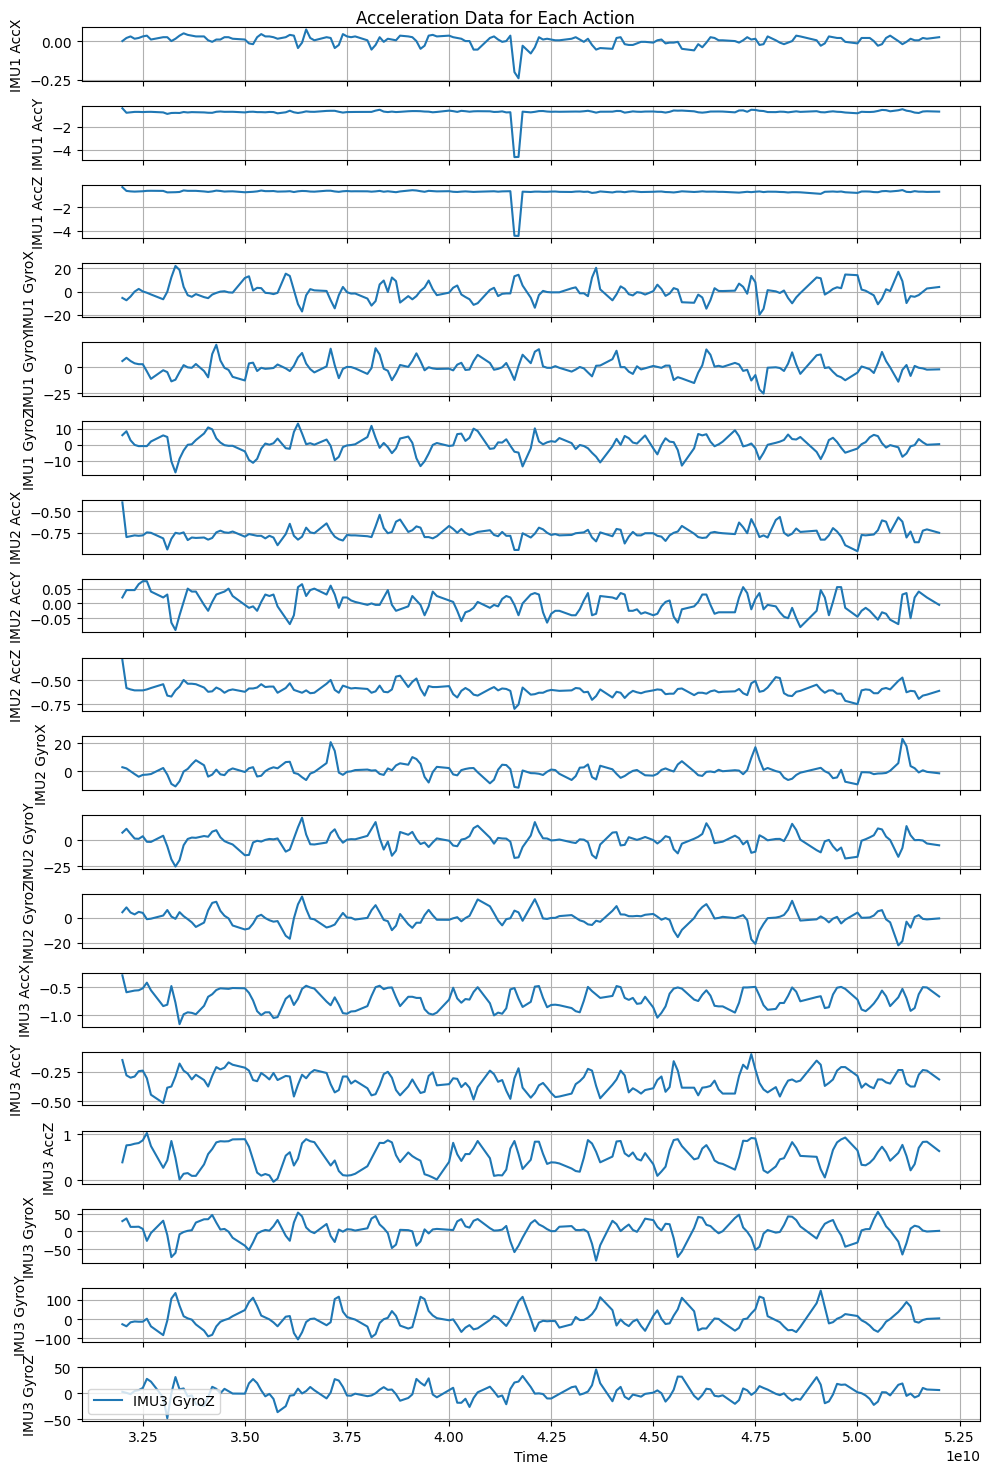

In [137]:
import numpy as np

def moving_average(signal, window_size):
    """
    使用移动平均滤波器平滑信号

    Parameters:
        signal (ndarray): 输入信号数组
        window_size (int): 窗口大小

    Returns:
        smoothed_signal (ndarray): 平滑后的信号数组
    """
    smoothed_signal = np.convolve(signal, np.ones(window_size)/window_size, mode='same')
    return smoothed_signal

# 定义窗口大小
window_size = 2  # 可根据需要调整

# 平滑每个动作的数据列
smoothed_actions_acc = []
for action_data in actions_acc:
    smoothed_data = moving_average(action_data, window_size)
    smoothed_actions_acc.append(smoothed_data)

# 将平滑后的数据重新赋值给 desired_data 的每个动作数据列
for i, column in enumerate(actions_acc):
    desired_data[column.name] = smoothed_actions_acc[i]

# 打印平滑后的数据
print(desired_data)

actions_acc_2 = [desired_data['IMU1 AccX'], desired_data['IMU1 AccY'], desired_data['IMU1 AccZ'], desired_data['IMU1 GyroX'], desired_data['IMU1 GyroY'], desired_data['IMU1 GyroZ'],
               desired_data['IMU2 AccX'], desired_data['IMU2 AccY'], desired_data['IMU2 AccZ'], desired_data['IMU2 GyroX'], desired_data['IMU2 GyroY'], desired_data['IMU2 GyroZ'],
               desired_data['IMU3 AccX'], desired_data['IMU3 AccY'], desired_data['IMU3 AccZ'], desired_data['IMU3 GyroX'], desired_data['IMU3 GyroY'], desired_data['IMU3 GyroZ']]


# 创建一个新的图形，并设置子图布局
fig, axs_acc_2 = plt.subplots(len(actions_acc), 1, figsize=(10, 15), sharex=True)

# 调整子图布局
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.3)

# 绘制每个动作的数据列（加速度）在特定时间范围内
for i, action_data_acc in enumerate(actions_acc_2):
    axs_acc_2[i].plot(desired_data['Time'], action_data_acc, label=action_data_acc.name)
    axs_acc_2[i].set_ylabel(action_data_acc.name)
    axs_acc_2[i].grid(True)

# 添加图例和标题（加速度图）
plt.legend()
plt.xlabel('Time')
plt.suptitle('Acceleration Data for Each Action')

# 显示加速度图
plt.tight_layout()
plt.show()

In [138]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import signal

# # 假设 peaks 是包含峰值索引的数组

# def peak_detection_and_print(peaks, time):
#     peak_times = [time[idx] for idx in peaks]  # 获取峰值对应的时间戳
#     peak_times_str = [str(np.timedelta64(int(time * 1e9), 'ns')) for time in peak_times]  # 将时间戳转换为字符串格式

#     print("峰值时间戳: ", peak_times_str)

# # 在循环中调用 peak_detection_and_print 函数
# for i, action_data_acc in enumerate(actions_acc_2):
#     action_time = desired_data['Time']  # 假设时间数据是 'Time'
#     peaks, _ = signal.find_peaks(action_data_acc, distance=5)

#     axs_acc_2[i].plot(action_time, action_data_acc, label=action_data_acc.name)
#     axs_acc_2[i].set_ylabel(action_data_acc.name)
#     axs_acc_2[i].grid(True)

#     peak_detection_and_print(peaks, action_time)



In [144]:
import pandas as pd

# 将时间列转换为时间戳格式
desired_data['Time'] = pd.to_timedelta(desired_data['Time'])

# 指定窗口大小和重叠
window_size = pd.Timedelta(seconds=2)  # 窗口大小为2秒
overlap = pd.Timedelta(seconds=1)      # 重叠为1秒

segmented_data = []  # 存储分段后的数据

# 获取时间列
time = desired_data['Time']

start_time = time.min()  # 初始时间
end_time = start_time + window_size  # 结束时间

while end_time <= time.max():
    mask = (time >= start_time) & (time < end_time)
    segment_data = desired_data.loc[mask].copy()  # 从原始数据中提取对应时间段的数据
    segmented_data.append(segment_data)

    # 更新窗口的起始时间和结束时间
    start_time = start_time + overlap
    end_time = start_time + window_size

import os

# 创建一个名为 "axi" 的文件夹，如果该文件夹不存在
folder_path = "./axi"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# 将每个分段数据保存为 CSV 文件
for i, segment in enumerate(segmented_data, start=1):
    file_name = f"axi-hb-{i}.csv"
    file_path = os.path.join(folder_path, file_name)
    segment.to_csv(file_path, index=False)


<ipython-input-144-4f6fcb097fd8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desired_data['Time'] = pd.to_timedelta(desired_data['Time'])


In [145]:

import os
import shutil

# 创建一个名为 "axi" 的文件夹，如果该文件夹不存在
folder_path = "./axi"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# 将每个分段数据保存为 CSV 文件
for i, segment in enumerate(segmented_data, start=1):
    file_name = f"axi-hb-{i}.csv"
    file_path = os.path.join(folder_path, file_name)
    segment.to_csv(file_path, index=False)

# 将文件夹压缩为 zip 文件
shutil.make_archive("/content/axi", 'zip', "./axi")


'/content/axi.zip'